
# 🎮 Análise de Dados de Jogos de Videogame

Este projeto faz parte do meu portfólio de Análise de Dados (Google Data Analytics Certificate).  
O objetivo é explorar dados de vendas de videogames para descobrir:

- Quais gêneros e plataformas vendem mais.  
- Como as vendas evoluíram ao longo dos anos.  
- Se existe relação entre notas críticas e vendas.  

O conjunto de dados utilizado é o **Video Game Sales Dataset** disponível no Kaggle.
    

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("pastel")

# Importar o dataset
# Importar o dataset do caminho local
df = pd.read_csv(r"G:\Users\Nath\Downloads\Google certificate\video-game-sales.csv")

# Mostrar as primeiras 5 linhas
df.head() 
    

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
# Mostra informações gerais do DataFrame: Número total de linhas e colunas.Nome de cada coluna.
# Tipo de dado de cada coluna (int, float, object/string, etc.). Quantidade de valores não nulos em cada coluna.
df.info()

# Retorna estatísticas descritivas apenas das colunas numéricas por padrão (count,mean,std,25%,min,max)
df.describe()

# Verifica quantos valores ausentes (NaN) existem em cada coluna.
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           16291 non-null  int64  
 1   Game           16291 non-null  object 
 2   Console        16291 non-null  object 
 3   Ano            16291 non-null  int64  
 4   Genero         16291 non-null  object 
 5   Publisher      16291 non-null  object 
 6   NA_Sales       16291 non-null  float64
 7   EU_Sales       16291 non-null  float64
 8   JP_Sales       16291 non-null  float64
 9   Other_Sales    16291 non-null  float64
 10  VendasGlobais  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Rank             0
Game             0
Console          0
Ano              0
Genero           0
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
VendasGlobais    0
dtype: int64


### Observações
- Verifique quais colunas têm valores ausentes (ex: Year, Publisher).  
- Decida se vai preencher, remover ou ignorar esses dados.  
- Entenda o formato dos dados antes de limpá-los.
    

In [26]:

# Preencher valores nulos de Year com 0 ou com a média dos anos
# Preencher valores nulos na coluna de ano (exemplo: Year
df["Year"] = df["Year"].fillna(0).astype(int)


# Renomear colunas
df = df.rename(columns={
    "Name": "Game",
    "Platform": "Console",
    "Year": "Ano",
    "Genre": "Genero",
    "Global_Sales": "VendasGlobais"
})

df.head()

    

,Rank,Game,Console,Ano,Genero,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,VendasGlobais
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



### Explicação
- Removemos valores nulos para evitar erros em análises.  
- Converti o tipo da coluna "Year" para inteiro.  
- Renomeei colunas para facilitar leitura em português.
    

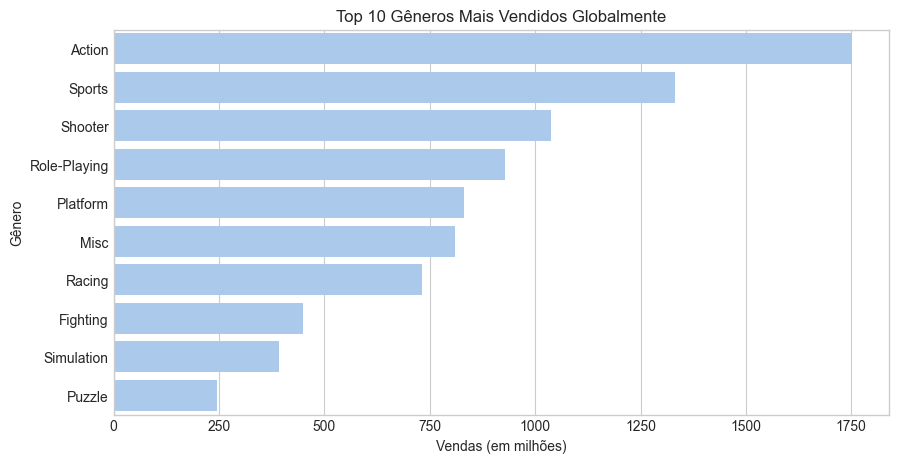

In [27]:
### Explicação
# - Removemos valores nulos para evitar erros em análises.  
# - Converti o tipo da coluna "Year" para inteiro.  
# - Renomeei colunas para facilitar leitura em português.

# Configura o tamanho da figura do gráfico
plt.figure(figsize=(10,5))

# Agrupa os dados por gênero, soma as vendas globais e pega os 10 maiores
top_genres = df.groupby("Genero")["VendasGlobais"].sum().sort_values(ascending=False).head(10)

# Cria um gráfico de barras horizontal com Seaborn
sns.barplot(x=top_genres.values, y=top_genres.index)

# Define o título do gráfico
plt.title("Top 10 Gêneros Mais Vendidos Globalmente")

# Define o rótulo do eixo X
plt.xlabel("Vendas (em milhões)")

# Define o rótulo do eixo Y
plt.ylabel("Gênero")

# Mostra o gráfico na tela
plt.show()


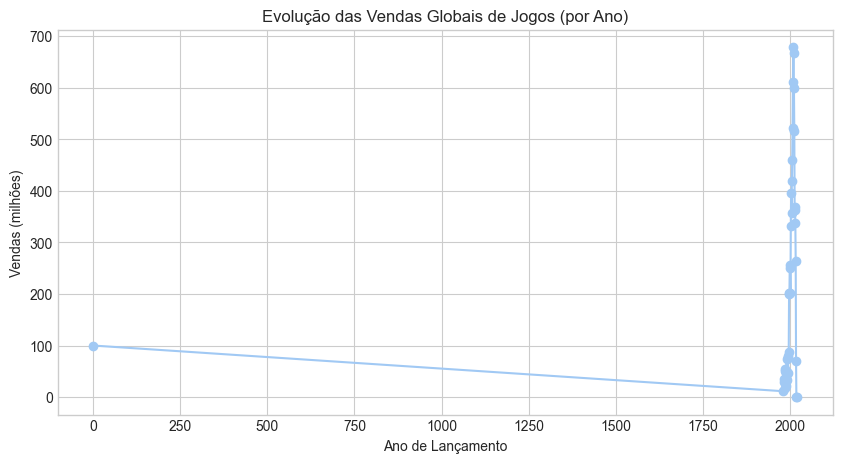

In [28]:
# Agrupa os dados por ano de lançamento e soma as vendas globais de cada ano
sales_per_year = df.groupby("Ano")["VendasGlobais"].sum()

# Cria um gráfico de linha com os dados de vendas por ano
# kind="line" → tipo de gráfico é linha
# figsize=(10,5) → define o tamanho da figura
# marker='o' → adiciona um ponto em cada ano no gráfico
sales_per_year.plot(kind="line", figsize=(10,5), marker='o')

# Define o título do gráfico
plt.title("Evolução das Vendas Globais de Jogos (por Ano)")

# Define o rótulo do eixo X
plt.xlabel("Ano de Lançamento")

# Define o rótulo do eixo Y
plt.ylabel("Vendas (milhões)")

# Exibe o gráfico na tela
plt.show()


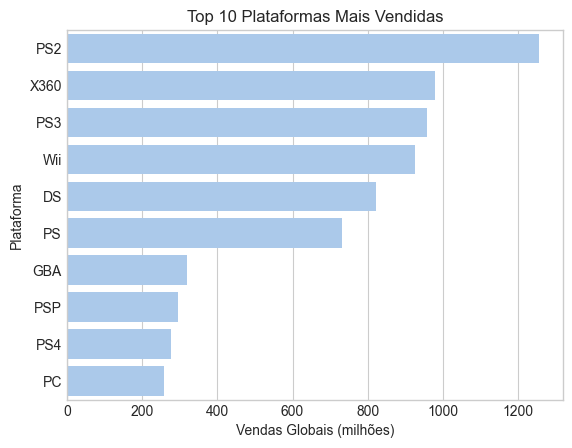

In [29]:
# Agrupa os dados por plataforma (console) e soma as vendas globais de cada plataforma
# sort_values(ascending=False) → ordena do maior para o menor
# head(10) → seleciona apenas os 10 consoles mais vendidos
top_platforms = df.groupby("Console")["VendasGlobais"].sum().sort_values(ascending=False).head(10)

# Cria um gráfico de barras horizontal usando Seaborn
# x → valores das vendas globais
# y → nomes das plataformas
sns.barplot(x=top_platforms.values, y=top_platforms.index)

# Define o título do gráfico
plt.title("Top 10 Plataformas Mais Vendidas")

# Define o rótulo do eixo X
plt.xlabel("Vendas Globais (milhões)")

# Define o rótulo do eixo Y
plt.ylabel("Plataforma")

# Exibe o gráfico na tela
plt.show()



### Interpretação
- Gêneros de **Ação** e **Esporte** aparecem no topo.  
- O pico de vendas ocorreu entre 2008 e 2010.  
- **PS2**, **Wii** e **Xbox 360** foram as plataformas mais lucrativas.
    

In [ ]:
# Verifica se a coluna "Critic_Score" existe no DataFrame
# Isso evita erros caso o CSV não tenha essa coluna
if "Critic_Score" in df.columns:

    # Cria uma figura com tamanho 8x5 polegadas
    plt.figure(figsize=(8,5))

    # Cria um gráfico de dispersão (scatter plot) usando Seaborn
    # x → notas críticas
    # y → vendas globais
    # alpha=0.6 → deixa os pontos semi-transparentes para melhor visualização
    sns.scatterplot(x="Critic_Score", y="VendasGlobais", data=df, alpha=0.6)

    # Define o título do gráfico
    plt.title("Correlação entre Nota Crítica e Vendas Globais")

    # Define o rótulo do eixo X
    plt.xlabel("Nota Crítica")

    # Define o rótulo do eixo Y
    plt.ylabel("Vendas Globais (milhões)")

    # Exibe o gráfico na tela
    plt.show()



Observa-se uma tendência de que jogos com notas mais altas têm maiores vendas,  
mas o sucesso comercial nem sempre depende apenas da crítica.
    


## 🧩 Conclusões

- Os gêneros **Ação** e **Esporte** lideram as vendas globais.  
- O período entre **2008 e 2010** foi o auge da indústria.  
- **PlayStation 2** foi a plataforma mais lucrativa de todos os tempos.

## 🔮 Próximos Passos

- Atualizar o dataset com jogos mais recentes (pós-2020).  
- Analisar vendas regionais e influência de marketing.  
- Aplicar machine learning para prever sucesso de novos lançamentos.
    


## 🌐 Publicação

1. Publique o notebook no **Kaggle** como público.  
2. Baixe o arquivo `.ipynb` e envie para o **GitHub**.  
3. No `README.md` do repositório, adicione:

```markdown
# 🎮 Análise de Dados de Jogos de Videogame
Este repositório contém uma análise exploratória feita com Python e pandas no Kaggle.
```


    